# Supplementary Scripts 
This folder containse the code used to generate figures in the pdf workshop notes but not inlcuded in the main workshop notebook inroder to keep it precise.


In [1]:
# Some important libraries to use in time sereies analysis
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
import statsmodels as statsmodels
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
from pandasdmx import Request
import pandas as pd
import os

# Setting fixed figure size
plt.rcParams['figure.figsize'] = [10, 7.5]
plt.rcParams.update({'font.size': 18})

### Lake Huron Linear Regression

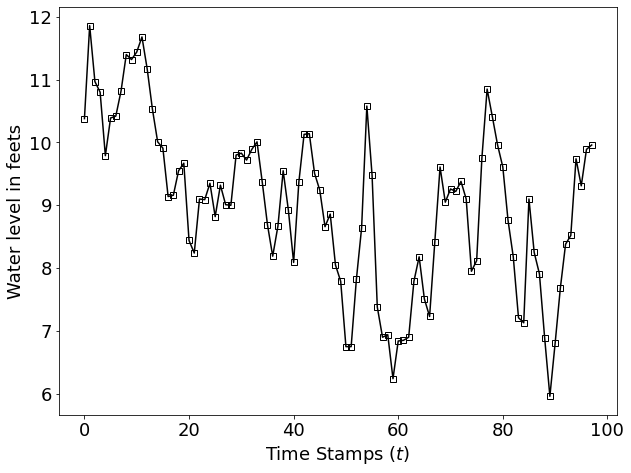

In [2]:
# Obtaining path to data and getting the data
filepath = os.getcwd()
datapath = filepath +"/Data/lakedata.xlsx"
figurepath = filepath+"/Figures"
df = pd.read_excel(datapath)

#plotting data as numpy arrays
data = df.iloc[:,0].to_numpy()
dataTime = np.arange(0,data.shape[0])
plt.figure()
plt.plot(dataTime, data,"k", marker='s', markerfacecolor='none')
plt.xlabel("Time Stamps $(t)$")
plt.ylabel("Water level in feets")

#save figure
plt.savefig(figurepath+"/lakedata.pdf", format="pdf", bbox_inches="tight")
plt.show()

Linear regression with Lake Huron Data for $0\leq t \leq 96$

In [9]:
V = np.stack([np.ones(dataTime.shape).T, dataTime.T, (dataTime.T)**2], axis =0).T
VFit = V[0:-1,:]
dataFit = data[0:-1]
a = np.linalg.pinv(VFit)@dataFit.T
a


array([ 1.11927234e+01, -8.68981968e-02,  6.38800778e-04])

Plot the polynomial fit and prediction step.

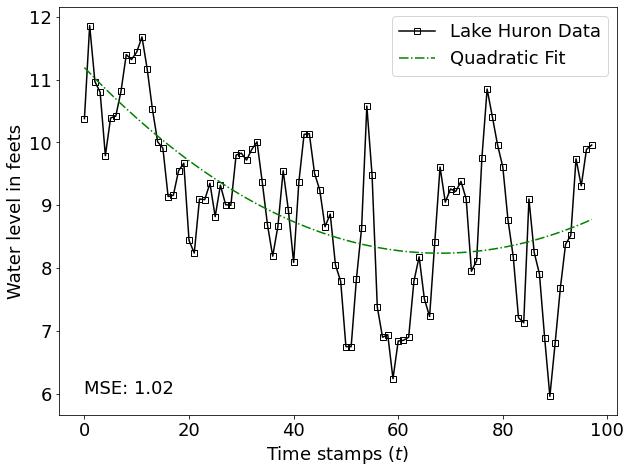

In [10]:
#plotting data as numpy arrays
xPreds = a @ V.T
MSE_Quad =((data - xPreds)**2).mean()
plt.figure()
plt.plot(dataTime, data,  "k", marker='s', markerfacecolor='none')
plt.plot(dataTime, xPreds, 'g-.')
plt.xlabel("Time stamps $(t)$")
plt.ylabel("Water level in feets")
plt.legend(["Lake Huron Data", "Quadratic Fit"])
plt.text(0, 6, "MSE: {:.2f}".format(MSE_Quad))
#save figure
plt.savefig(figurepath+"/lakefit.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [11]:
#predicting water level in 1972
m97 = a@[[1],[97],[97**2]]
print("prediction:",m97[0], " \nactual value:" ,data[-1])

# Error
error =  np.abs(m97 - data[-1])
print("error",error[0])

prediction: 8.774074877917176  
actual value: 9.96
error 1.1859251220828249


Residual Plot

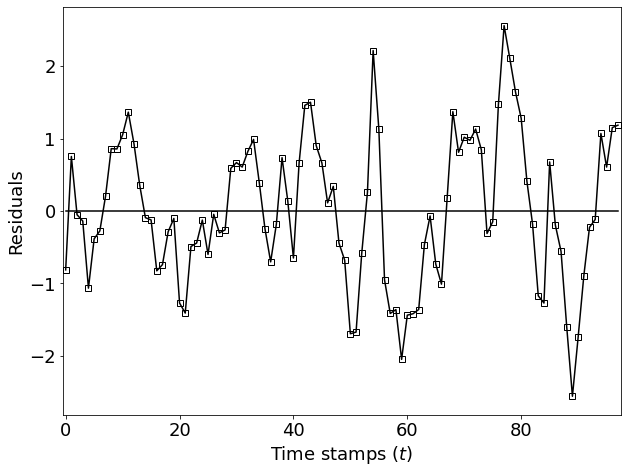

In [12]:
resds = data- xPreds
plt.figure()
plt.plot(dataTime, resds,  "k", marker='s', markerfacecolor='none')
plt.plot(dataTime, np.zeros(dataTime.shape), "k")
plt.xlabel("Time stamps $(t)$")
plt.ylabel("Residuals")
plt.xlim([dataTime[0]-0.5, dataTime[-1]+0.5])
#save figure
plt.savefig(figurepath+"/lakefitres.pdf", format="pdf", bbox_inches="tight")
plt.show()

Lets calculate the autocorrelation of the residuals. WE can see that the residuals are not IID

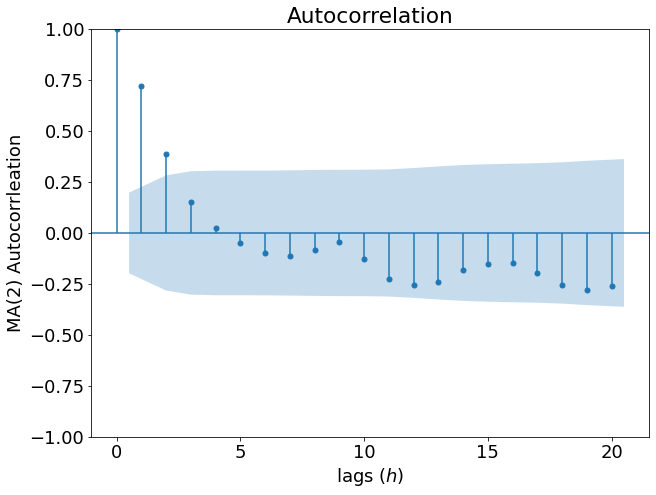

In [13]:
plot_acf(resds, lags =20)
plt.xlabel("lags $(h)$")
plt.ylabel("MA(2) Autocorrleation")
plt.show()